In [1]:
#import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy


In [2]:
#create a set of random latitude and longitude combinations
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#create a list for holding the cities
cities=[]
#identify the nearest cit;y for  each latitiude and longitude combination
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the citty is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count
len(cities)

607

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
#starting url fro weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=754d73b37a46d4b7c3ec3c5fd60f9874


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
#create an empty list to hold the weather data
city_data = []
#print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1 
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    #group cities intosets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        recrd_count =1
        time.sleep(60)
        
    #create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the url, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #add 1 to the record count
    record_count +=1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | hobyo
Processing Record 3 of Set 1 | chipinge
Processing Record 4 of Set 1 | yenagoa
Processing Record 5 of Set 1 | kedgwick
Processing Record 6 of Set 1 | tamandare
Processing Record 7 of Set 1 | mahebourg
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | necochea
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | san patricio
Processing Record 14 of Set 1 | urdoma
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | sao joao da barra
Processing Record 17 of Set 1 | pangnirtung
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | surgut
Processing Record 22 of Set 1 | bredasdorp
Proces

Processing Record 186 of Set 4 | san cristobal
Processing Record 187 of Set 4 | navirai
Processing Record 188 of Set 4 | winnemucca
Processing Record 189 of Set 4 | impfondo
Processing Record 190 of Set 4 | yakeshi
Processing Record 191 of Set 4 | suntar
Processing Record 192 of Set 4 | sao jose da coroa grande
Processing Record 193 of Set 4 | tupik
Processing Record 194 of Set 4 | kamarion
Processing Record 195 of Set 4 | veinticinco de mayo
Processing Record 196 of Set 4 | port elizabeth
Processing Record 197 of Set 4 | coahuayana
Processing Record 198 of Set 4 | yar-sale
Processing Record 199 of Set 4 | san juan
Processing Record 200 of Set 4 | comodoro rivadavia
Processing Record 201 of Set 5 | zalantun
Processing Record 202 of Set 5 | desur
Processing Record 203 of Set 5 | cururupu
Processing Record 204 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 205 of Set 5 | novovarshavka
Processing Record 206 of Set 5 | sobolevo
Processing Record 207 of Set 5 | dandong

Processing Record 370 of Set 8 | longyearbyen
Processing Record 371 of Set 8 | thomaston
Processing Record 372 of Set 8 | nabire
Processing Record 373 of Set 8 | blois
Processing Record 374 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 375 of Set 8 | burns lake
Processing Record 376 of Set 8 | iturama
Processing Record 377 of Set 8 | cravo norte
Processing Record 378 of Set 8 | kaura namoda
Processing Record 379 of Set 8 | gollere
City not found. Skipping...
Processing Record 380 of Set 8 | mpongwe
Processing Record 381 of Set 8 | umm lajj
Processing Record 382 of Set 8 | sola
Processing Record 383 of Set 8 | tena
Processing Record 384 of Set 8 | lompoc
Processing Record 385 of Set 8 | lucapa
Processing Record 386 of Set 8 | kupang
Processing Record 387 of Set 8 | inirida
Processing Record 388 of Set 8 | talnakh
Processing Record 389 of Set 8 | trebukhiv
Processing Record 390 of Set 8 | chadiza
Processing Record 391 of Set 8 | namibe
Processing Record 392 of Set 8

Processing Record 550 of Set 11 | swan hill
Processing Record 551 of Set 12 | naze
Processing Record 552 of Set 12 | gushikawa
Processing Record 553 of Set 12 | dzhebariki-khaya
Processing Record 554 of Set 12 | ribeira brava
Processing Record 555 of Set 12 | ayagoz
Processing Record 556 of Set 12 | bentong
Processing Record 557 of Set 12 | les cayes
Processing Record 558 of Set 12 | sault sainte marie
Processing Record 559 of Set 12 | kerteh
City not found. Skipping...
Processing Record 560 of Set 12 | ulladulla
Processing Record 561 of Set 12 | beringovskiy
Processing Record 562 of Set 12 | okhotsk
Processing Record 563 of Set 12 | saint-pierre
Processing Record 564 of Set 12 | rocha
Processing Record 565 of Set 12 | uvira
Processing Record 566 of Set 12 | waddan
Processing Record 567 of Set 12 | yuanping
Processing Record 568 of Set 12 | bintulu
Processing Record 569 of Set 12 | shimoda
Processing Record 570 of Set 12 | patti
Processing Record 571 of Set 12 | henties bay
Processing 

In [9]:
len(city_data)

552

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,89.28,73,75,13.80,US,2022-05-26 00:51:35
1,Hobyo,5.3505,48.5268,78.85,82,79,22.41,SO,2022-05-26 00:53:19
2,Chipinge,-20.1883,32.6236,56.23,62,0,2.21,ZW,2022-05-26 00:53:19
3,Yenagoa,4.9247,6.2642,74.41,94,97,4.41,NG,2022-05-26 00:53:20
4,Kedgwick,47.6446,-67.3434,50.63,73,100,1.90,CA,2022-05-26 00:53:20
5,Tamandare,-8.7597,-35.1047,75.65,89,75,9.28,BR,2022-05-26 00:53:20
6,Mahebourg,-20.4081,57.7000,70.25,69,16,8.61,MU,2022-05-26 00:53:21
7,Chuy,-33.6971,-53.4616,57.43,92,100,17.56,UY,2022-05-26 00:53:21
8,Necochea,-38.5473,-58.7368,46.49,63,18,8.41,AR,2022-05-26 00:53:22
9,Albany,42.6001,-73.9662,67.17,60,89,5.93,US,2022-05-26 00:48:22


In [11]:
#assign new column order
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2022-05-26 00:51:35,19.7297,-155.0900,89.28,73,75,13.80
1,Hobyo,SO,2022-05-26 00:53:19,5.3505,48.5268,78.85,82,79,22.41
2,Chipinge,ZW,2022-05-26 00:53:19,-20.1883,32.6236,56.23,62,0,2.21
3,Yenagoa,NG,2022-05-26 00:53:20,4.9247,6.2642,74.41,94,97,4.41
4,Kedgwick,CA,2022-05-26 00:53:20,47.6446,-67.3434,50.63,73,100,1.90
...,...,...,...,...,...,...,...,...,...
547,Olinda,BR,2022-05-26 01:08:27,-8.0089,-34.8553,73.13,94,75,8.05
548,Stony Plain,CA,2022-05-26 01:08:27,53.5334,-114.0021,66.78,44,100,6.40
549,Ischia,IT,2022-05-26 01:08:28,40.7342,13.9471,74.95,87,64,1.99
550,Biak,ID,2022-05-26 01:08:28,-0.9131,122.8766,81.34,75,96,4.09


In [12]:
#create an output file (csv)
output_data_file="weather_data/cities.csv"
#export the city_data to aa csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
#extract releveant fields from teh dataframe
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df['Humidity']
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

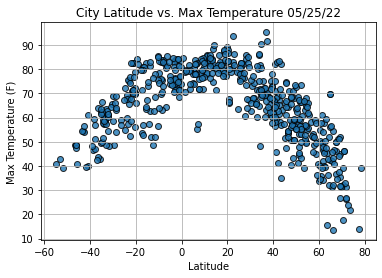

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

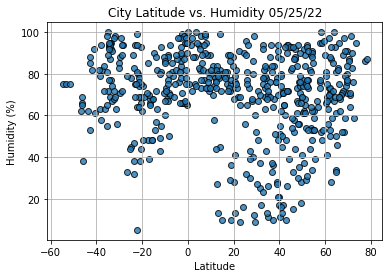

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

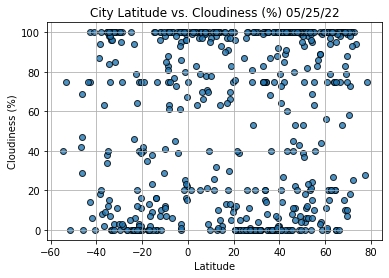

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

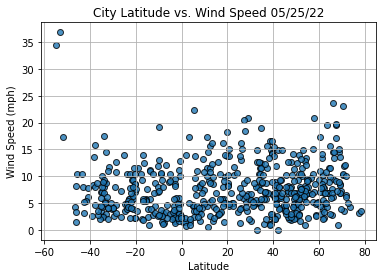

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
#import linregress form scipy
from scipy.stats import linregress

#craete a function to perfomr linear regression on the weather data
#and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    #run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #get the equation of the line
    line_eq = "y = " +str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [21]:
index13 = city_data_df.loc[13]
index13

City                       Atuona
Country                        PF
Date          2022-05-26 00:53:23
Lat                          -9.8
Lng                     -139.0333
Max Temp                    78.51
Humidity                       73
Cloudiness                      7
Wind Speed                  19.13
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
547    False
548     True
549     True
550    False
551    False
Name: Lat, Length: 552, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2022-05-26 00:51:35,19.7297,-155.0900,89.28,73,75,13.80
1,Hobyo,SO,2022-05-26 00:53:19,5.3505,48.5268,78.85,82,79,22.41
3,Yenagoa,NG,2022-05-26 00:53:20,4.9247,6.2642,74.41,94,97,4.41
4,Kedgwick,CA,2022-05-26 00:53:20,47.6446,-67.3434,50.63,73,100,1.90
9,Albany,US,2022-05-26 00:48:22,42.6001,-73.9662,67.17,60,89,5.93


In [24]:
#create a northern and southern hemisphere dataframe
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

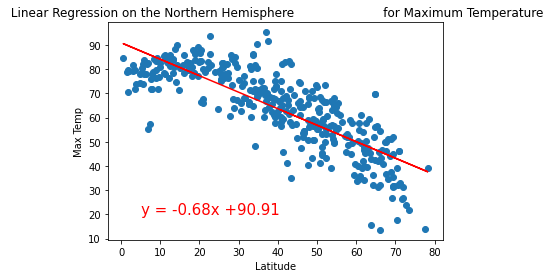

In [52]:
#linear regression on the northern hemisphere
x_values =northern_hemi_df["Lat"]
y_values= northern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values,
                      ' Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (5,20))

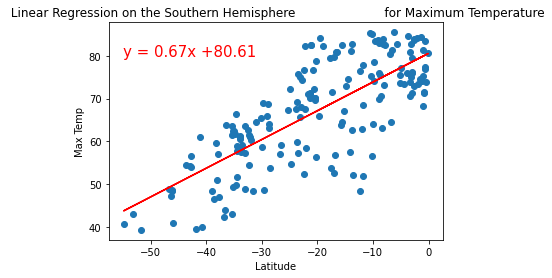

In [45]:
#linear regression on the northern hemisphere
x_values =southern_hemi_df["Lat"]
y_values= southern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values,
                      ' Linear Regression on the Southern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (-55,80))

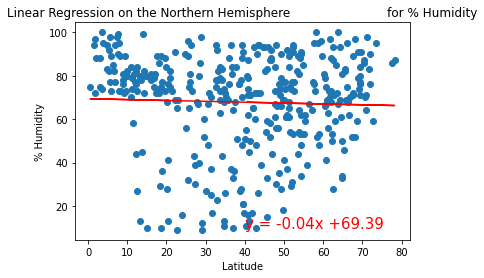

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

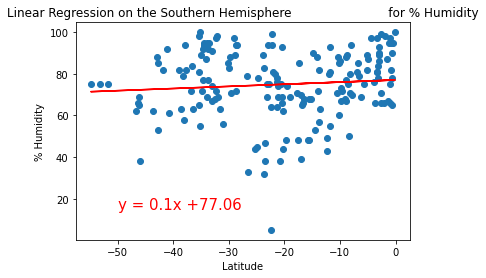

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

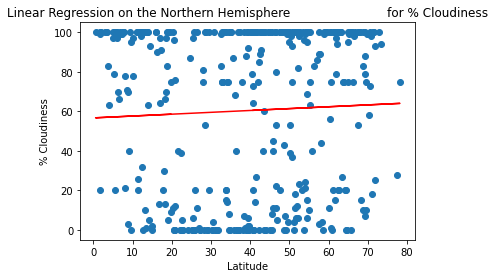

In [49]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

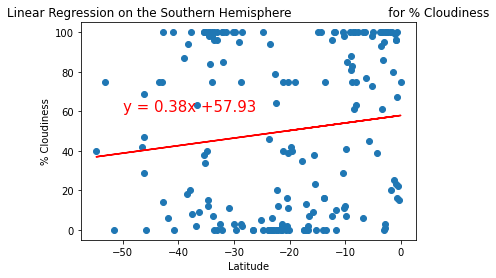

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

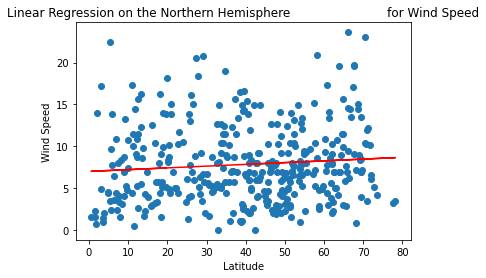

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

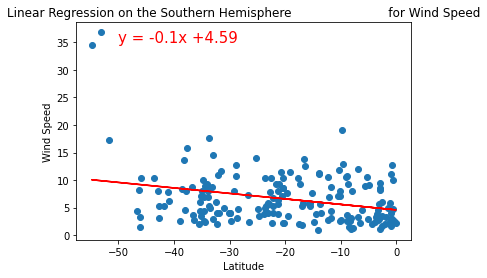

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))